In [1]:
import torch
import numpy as np 
from torch.autograd import Variable
import torch.nn.functional as fun
import matplotlib.pyplot as plt

In [2]:
#fake data
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1) #把一维随机数据变为二维，因为它只处理二维
y=x.pow(2)+0.2*torch.rand(x.size())

In [3]:
#转换为variable
x,y=Variable(x),Variable(y)

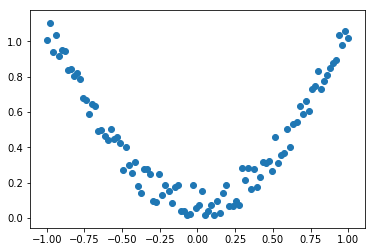

In [4]:
plt.scatter(x.data.numpy(),y.data.numpy()) #只处理np数据
plt.show()

In [5]:
#网络定义
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden) #定义两层结构
        self.predict=torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x=torch.relu(self.hidden(x)) #传播规则
        x=self.predict(x)
        return x

In [6]:
#网络构建
net=Net(1,10,1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [7]:
#实时打印
plt.ion()
plt.show()

In [8]:
#优化策略
optimizer=torch.optim.SGD(net.parameters(),lr=0.5)

In [9]:
#优化器
loss_func=torch.nn.MSELoss() #损失函数

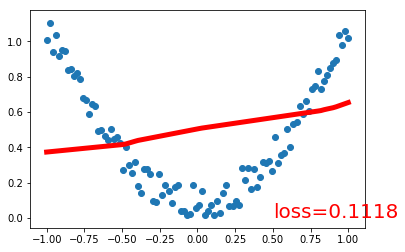

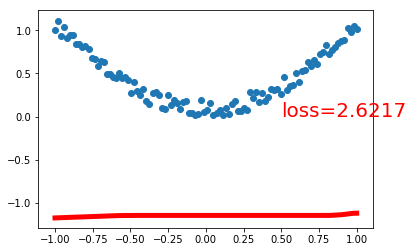

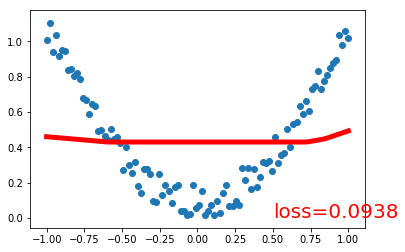

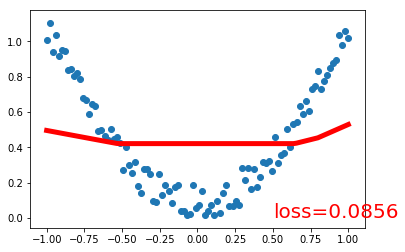

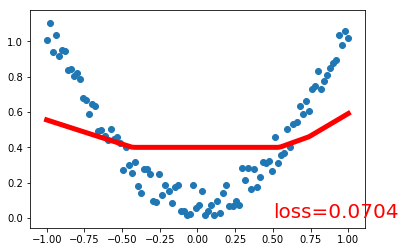

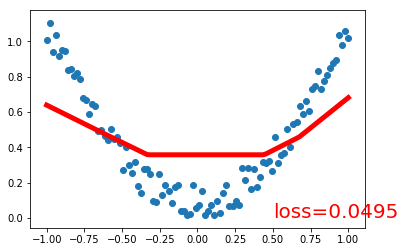

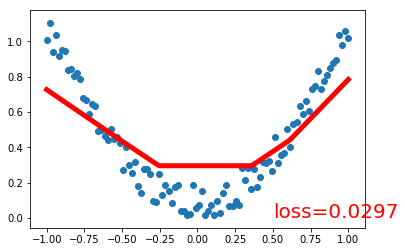

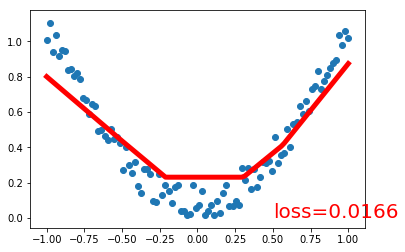

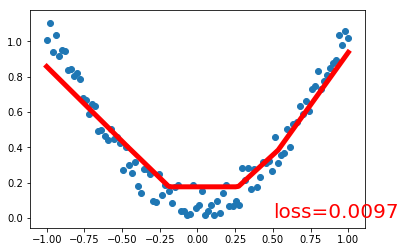

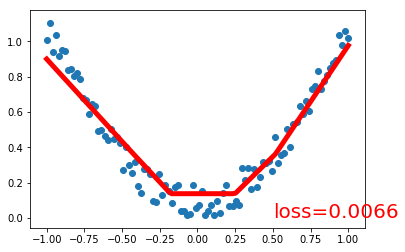

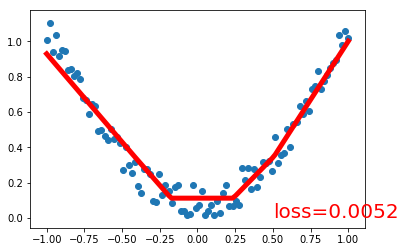

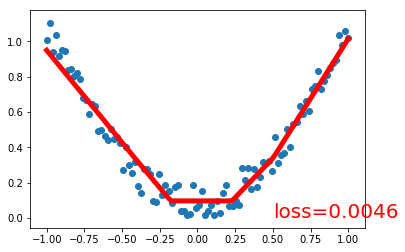

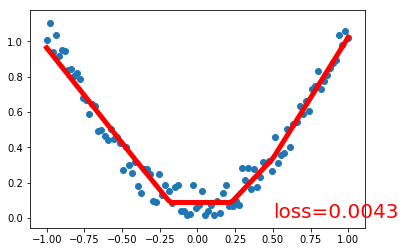

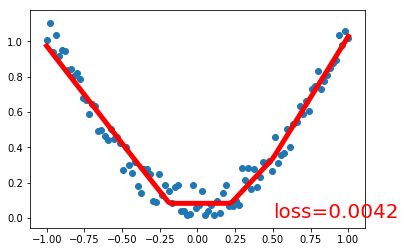

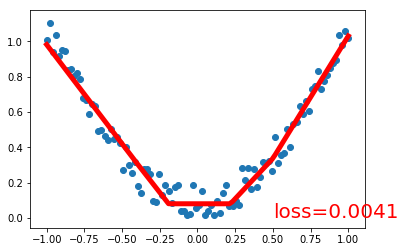

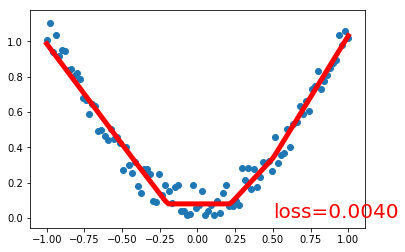

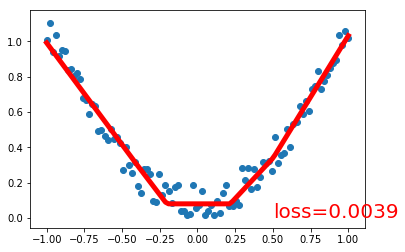

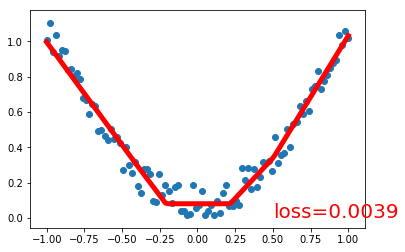

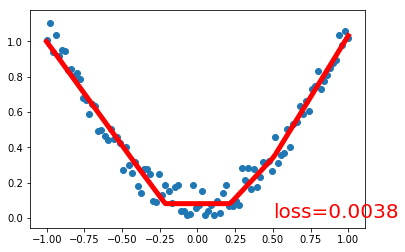

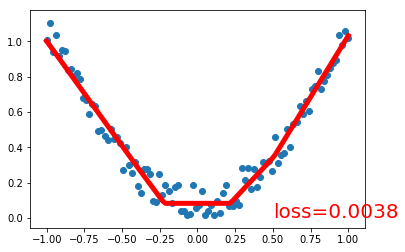

In [10]:
#训练100步
for i in range(100):
    prediction=net(x)
    loss=loss_func(prediction,y)
    #优化
    optimizer.zero_grad() #net中的梯度设为0
    loss.backward() #反传，记录梯度
    optimizer.step() #根据梯度修改参数
    if i%5==0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5,0,'loss=%.4f'%loss.data,fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
#关闭实时
plt.ioff()
plt.show()